<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

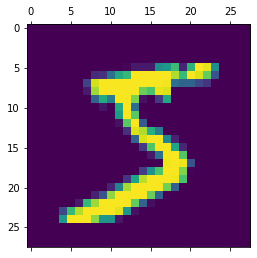

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 497us/step - loss: 0.7209 - accuracy: 0.8126
Epoch 2/5
1875/1875 [==============================] - 1s 509us/step - loss: 0.3115 - accuracy: 0.9118
Epoch 3/5
1875/1875 [==============================] - 1s 497us/step - loss: 0.2845 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 507us/step - loss: 0.2765 - accuracy: 0.9218
Epoch 5/5
1875/1875 [==============================] - 1s 504us/step - loss: 0.2694 - accuracy: 0.9247


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 446us/step - loss: 0.2669 - accuracy: 0.9253


[0.26689156889915466, 0.9253000020980835]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.84676647e-02, 3.06937693e-07, 5.70853949e-02, 9.67260599e-01,
       1.88130140e-03, 1.05054945e-01, 1.72788100e-06, 9.99767423e-01,
       8.77445638e-02, 6.96357071e-01], dtype=float32)

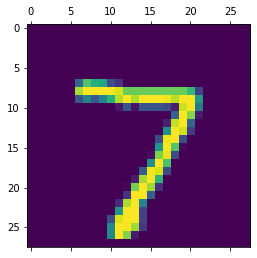

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    8,    7,    3,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,   11,  918,   19,    8,    5,   13,    9,   40,    5],
       [   3,    0,   16,  924,    0,   23,    3,   10,   20,   11],
       [   1,    1,    3,    1,  904,    0,   12,    4,   10,   46],
       [   7,    3,    2,   36,   11,  770,   18,    6,   31,    8],
       [   8,    3,    8,    1,    8,   10,  915,    2,    3,    0],
       [   1,    6,   21,    8,    6,    0,    0,  944,    3,   39],
       [   5,    8,    7,   21,    9,   25,    9,   10,  864,   16],
       [   9,    7,    1,    9,   15,    5,    0,   10,    6,  947]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

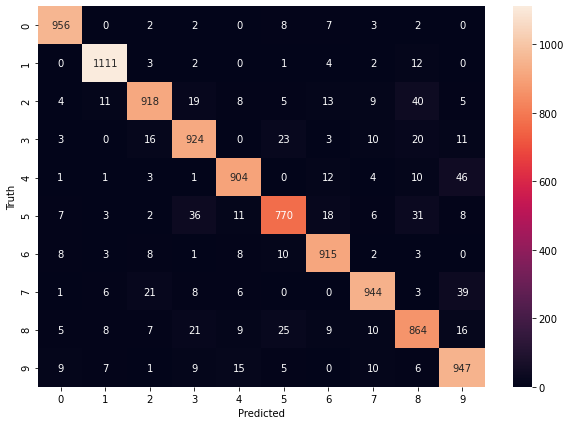

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 688us/step - loss: 0.4438 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.1292 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 1s 687us/step - loss: 0.0845 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.0641 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.0494 - accuracy: 0.9849


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 535us/step - loss: 0.0718 - accuracy: 0.9786


[0.07182039320468903, 0.978600025177002]

Text(69.0, 0.5, 'Truth')

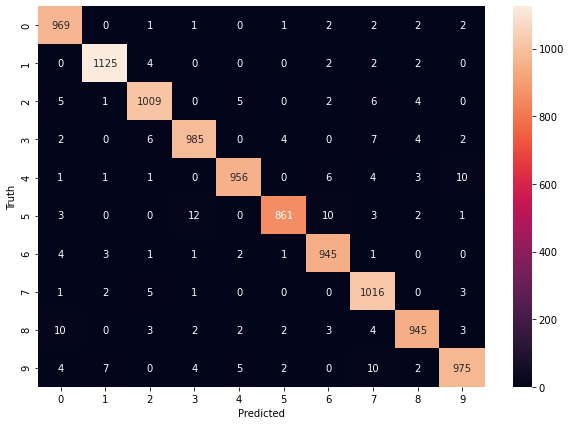

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 744us/step - loss: 0.4614 - accuracy: 0.8697
Epoch 2/10
1875/1875 [==============================] - 1s 716us/step - loss: 0.1291 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.0858 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.0478 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.0387 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.0305 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.0237 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.0213 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 1s 714u

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 546us/step - loss: 0.0760 - accuracy: 0.9795


[0.0760362520813942, 0.9794999957084656]